# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder, FunctionTransformer

from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import Pipeline

import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.svm import SVC


from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay, ConfusionMatrixDisplay, precision_recall_curve, roc_curve, auc as skl_auc, RocCurveDisplay

from sklearn.datasets import load_wine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


import timeit


import matplotlib.pyplot as plt
import warnings



from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline
from sklearn import set_config

from sklearn.ensemble import VotingClassifier


In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')


In [3]:
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### The data seems to be unbalanced for y column values between 'yes' and 'no' with yes to be more than 80%. This may  require special attention in how to train the model

In [5]:
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [7]:
import time
def find_onehot_columns(df):
    # Step 1: Identify discrete/categorical columns
    col_selector = make_column_selector(dtype_include=object)
    exclude_cols = ['education','y']
    selected_cols = col_selector(df)
    onehot_cols = [col for col in selected_cols if col not in exclude_cols]
    return onehot_cols

def find_numerical_columns(df):
    # Step 1: Identify discrete/categorical columns
    numerical_columns = []
    
    for column in df.columns:
        # Check if column is of object type (typically strings) or has few unique values
        if df[column].dtype in ['int64', 'float64']:  # Adjust threshold as needed
            numerical_columns.append(column)
            #print(f"Found numerical column: {column}")
    return numerical_columns



def model_train_test(model, model_name,  X_train, y_train, X_test, y_test, df_scores, timeit_number=1):

    train_time = timeit.timeit(lambda :model.fit(X_train, y_train) , number=timeit_number)
    train_score= model.score(X_train, y_train)
    test_score= model.score(X_test, y_test)
    
    df_scores.loc[len(df_scores)] = {
        'Model':model_name,
        'Train Time':train_time,
        'Train accuracy':train_score,
        'Test Accuracy':test_score
    }

    print(f"Scores for {model_name} \n {df_scores[-1:]}")
    '''
    cancer_preds = model.predict(X_test)
    cancer_confusion_mat = confusion_matrix(y_test, cancer_preds, labels=['yes', 'no'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cancer_confusion_mat, display_labels=['yes', 'no' ])
    disp.plot()
    plt.show()
    '''

    

    # fp = 126
    # fn = 194
    # auc = 0.86

    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(12, 12)

    preds = model.predict(X_test)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, preds)
    disp1 = ConfusionMatrixDisplay(conf_matrix)
    disp1.plot(ax=ax[0])

    # ROC Curve
    #if 'SVC' not in model_name:
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label='yes')
    roc_auc_value = skl_auc(fpr, tpr)

    disp2 = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_value)
    disp2.plot(ax=ax[1])

    fp = conf_matrix[0][1]
    fn = conf_matrix[1][0]
    auc = round(roc_auc_value, 2)

    #test_predictions = model.predict_proba(X_test)
    precision, recall, boundaries = precision_recall_curve(y_test, y_score, pos_label='yes')


    # Answer check
    print(boundaries[:5])
    plt.plot(precision, recall, '--o')
    plt.xticks(boundaries);
    plt.grid()
    plt.ylabel('Recall')
    plt.xlabel('Precision')
    plt.title('Precision vs Recall from sklearn');


def grid_search(grid, grid_name,  X_train, y_train, X_test, y_test, df_scores, timeit_number=1):
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    best_params = grid.best_params_

    model_train_test(best_model, grid_name,X_train, y_train, X_test, y_test, df_scores, timeit_number)
    '''
    fig, ax = plt.subplots()
    RocCurveDisplay.from_estimator(grid, X_test, y_test, pos_label = 'yes', ax = ax, label = f'Grid Search: {best_k} Neighbors')
#RocCurveDisplay.from_estimator(roc_grid, X_test, y_test, pos_label = 'Yes', ax = ax, label = 'Grid Search: 29 Neighbors')
#RocCurveDisplay.from_estimator(knn_pipe, X_test, y_test, pos_label = 'Yes', ax = ax, label = '10 Neighbors')
    #RocCurveDisplay.from_estimator(knn_pipeline, X_test, y_test, ax = ax, label = '1 Neighbor')
    plt.grid()
    plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
    plt.title('Using RocCurveDisplay')
    plt.legend();
    '''
    return (best_model, best_params)
    


In [8]:

X = df.copy()
X = X.drop(columns=['y'])
y=df['y'] 
'''
onehot_encoder = OneHotEncoder(drop = 'if_binary', handle_unknown='ignore')
ordinal_encoder_condition = OrdinalEncoder(categories = [['education']], handle_unknown='use_encoded_value', unknown_value=-1)

col_selector = make_column_selector(dtype_include=object)
ohe_transformer =make_column_transformer(
    [
        ('cat', OrdinalEncoder(), ['education']),
        (OneHotEncoder(drop = 'if_binary', handle_unknown='ignore'), find_onehot_columns),        
    ],
    remainder = StandardScaler())
'''
ordinal_ohe_transformer = make_column_transformer(    
    (OrdinalEncoder(categories = [['illiterate','basic.4y','basic.6y','basic.9y','high.school','professional.course','university.degree','unknown']], handle_unknown='use_encoded_value', unknown_value=-1),['education']), 
    (OneHotEncoder(drop = 'if_binary', handle_unknown='ignore'), find_onehot_columns(X)), 
    
    remainder=StandardScaler())

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [9]:



X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [10]:
df_scores= pd.DataFrame(columns=['Model','Train Time','Train accuracy','Test Accuracy'])
timeit_number =1

In [11]:

baseline =df['y'].value_counts(normalize = True).iloc[0]
df_scores.loc[len(df_scores)] = {
    'Model':'Baseline',
    'Train Time':0,
    'Train accuracy':baseline,
    'Test Accuracy':baseline

}
print(df_scores)

      Model  Train Time  Train accuracy  Test Accuracy
0  Baseline           0        0.887346       0.887346


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [12]:
print(X.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0           1.1          93.994

/home/ming/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Scores for LogisticRegression 
                 Model  Train Time  Train accuracy  Test Accuracy
1  LogisticRegression    4.983594        0.911625        0.91211
[0.00084047 0.00088406 0.00122131 0.00126979 0.00141193]


/home/ming/.local/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['illiterate',
                                                                              'basic.4y',
                                                                              'basic.6y',
                                                                              'basic.9y',
                                                                              'high.school',
                                                                              'professional.course',
                                                                              'university.degree',
                                                                              'unknown']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['education']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['job', 'marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('logistic', LogisticRegression())])

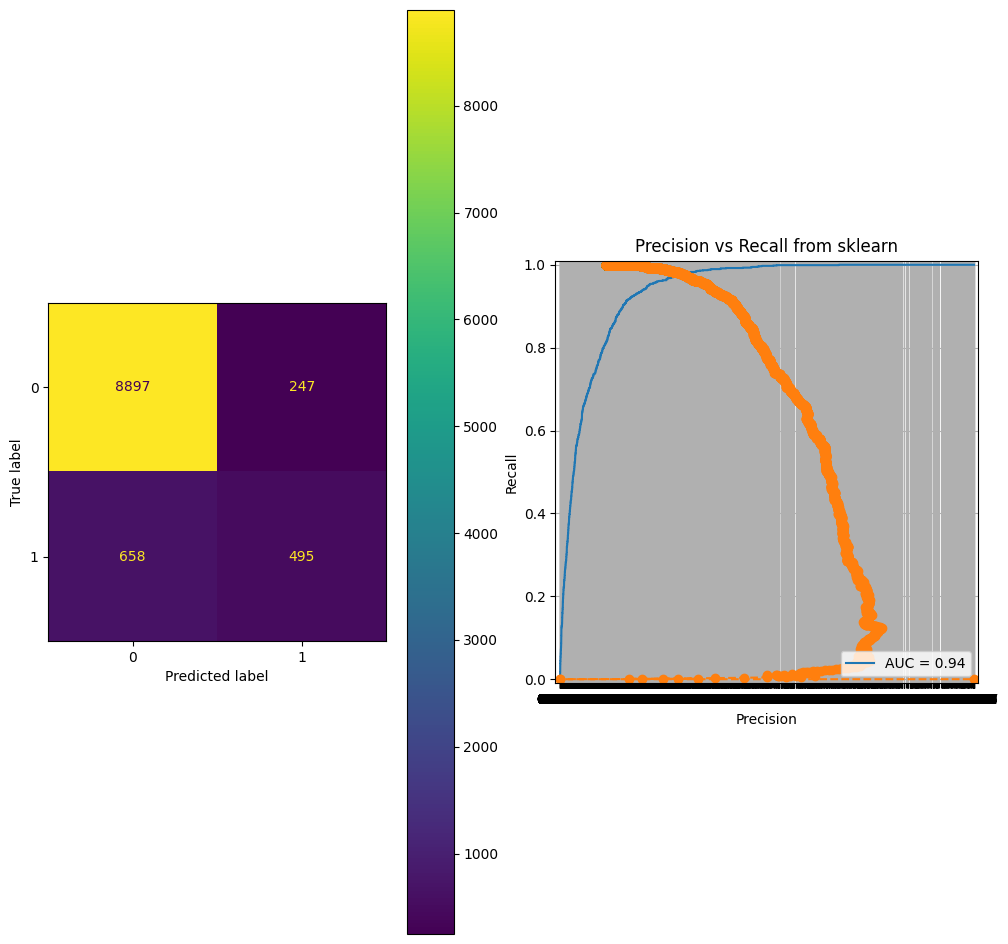

In [13]:

lr_pipeline = Pipeline([
    ('transformer', ordinal_ohe_transformer),   
    ('logistic', LogisticRegression())  
])
model_train_test(lr_pipeline, 'LogisticRegression',  X_train, y_train, X_test, y_test, df_scores, timeit_number= timeit_number)
lr_pipeline


Scores for RandomForestClassifier 
                     Model  Train Time  Train accuracy  Test Accuracy
3  RandomForestClassifier    2.907434             1.0       0.912402
[0.   0.01 0.02 0.03 0.04]


/home/ming/.local/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['illiterate',
                                                                              'basic.4y',
                                                                              'basic.6y',
                                                                              'basic.9y',
                                                                              'high.school',
                                                                              'professional.course',
                                                                              'university.degree',
                                                                              'unknown']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['education']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['job', 'marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('rf', RandomForestClassifier(random_state=42))])

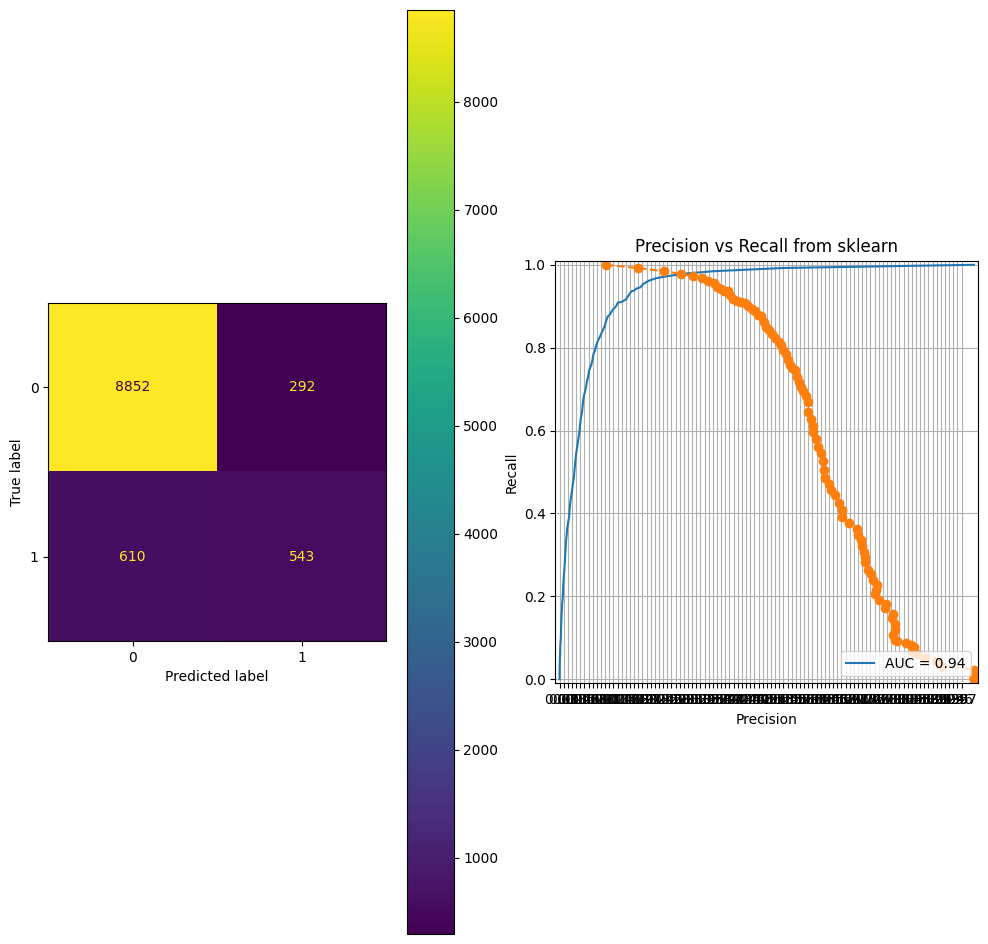

In [15]:

rf_pipeline = Pipeline([
    ('transformer', ordinal_ohe_transformer),   
    ('rf', RandomForestClassifier(random_state=42))  
])
model_train_test(rf_pipeline, 'RandomForestClassifier',  X_train, y_train, X_test, y_test, df_scores, timeit_number= timeit_number)
rf_pipeline

Use KNN to build a basic model on your data.  

Scores for KNeighborsClassifier 
                   Model  Train Time  Train accuracy  Test Accuracy
4  KNeighborsClassifier    0.091463        0.926613       0.903564
[0.  0.2 0.4 0.6 0.8]


/home/ming/.local/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['illiterate',
                                                                              'basic.4y',
                                                                              'basic.6y',
                                                                              'basic.9y',
                                                                              'high.school',
                                                                              'professional.course',
                                                                              'university.degree',
                                                                              'unknown']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['education']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['job', 'marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('knn', KNeighborsClassifier())])

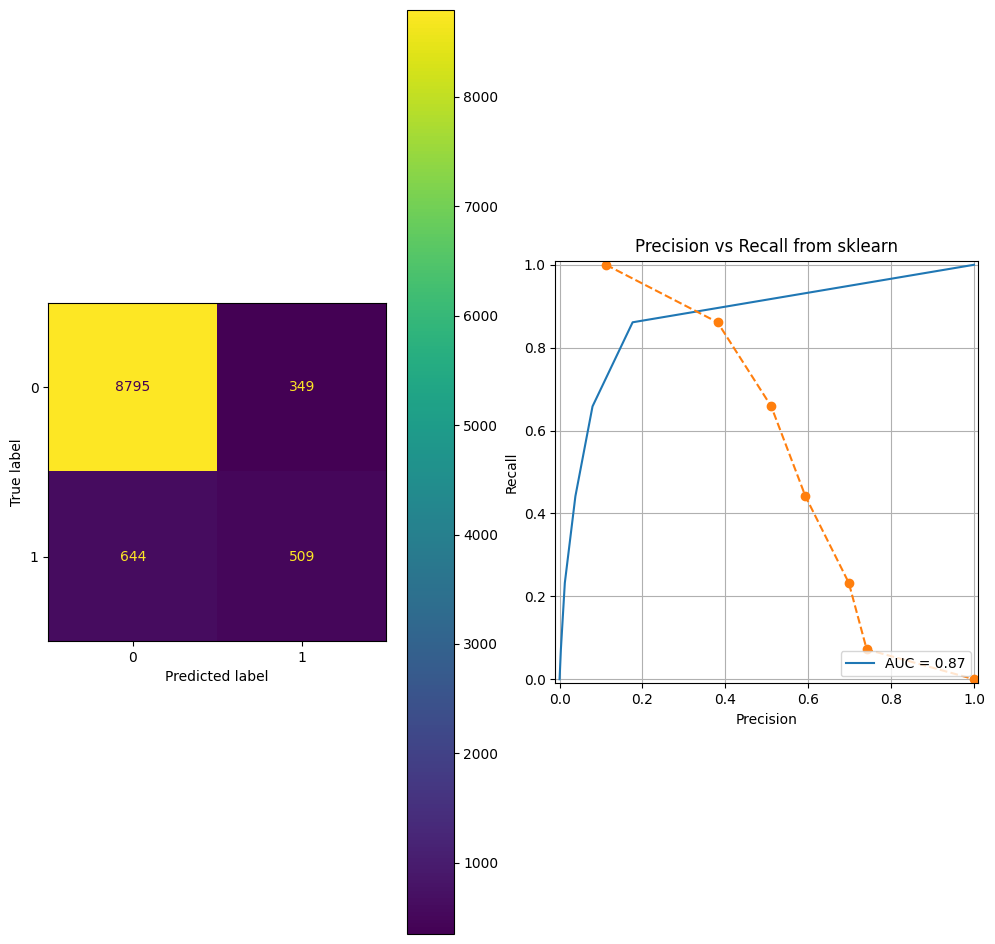

In [16]:
knn_pipeline = Pipeline([
    ('transformer', ordinal_ohe_transformer),   
    ('knn', KNeighborsClassifier())
])

model_train_test(knn_pipeline, 'KNeighborsClassifier',  X_train, y_train, X_test, y_test, df_scores, timeit_number = timeit_number)
knn_pipeline

[0.  0.2 0.4 0.6 0.8]


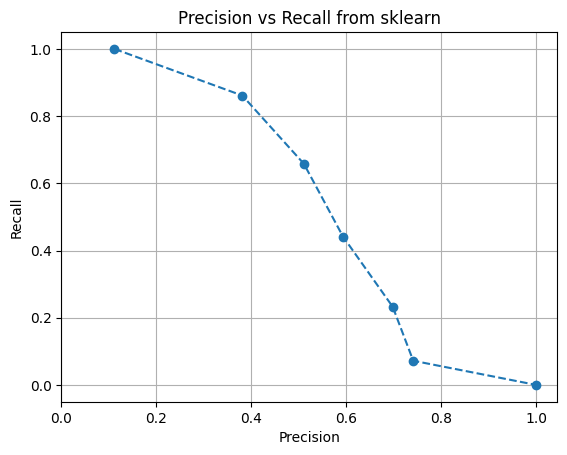

In [17]:

test_predictions = knn_pipeline.predict_proba(X_test)
precision, recall, boundaries = precision_recall_curve(y_test, test_predictions[:, 1], pos_label='yes')


# Answer check
print(boundaries[:5])
plt.plot(precision, recall, '--o')
plt.xticks(boundaries);
plt.grid()
plt.ylabel('Recall')
plt.xlabel('Precision')
plt.title('Precision vs Recall from sklearn');

Logistic model with select features

Scores for LogisticRegression with selector 
                               Model  Train Time  Train accuracy  Test Accuracy
5  LogisticRegression with selector    9.848093        0.911657       0.912693
[0.00083557 0.0008425  0.00120373 0.00123146 0.00142033]


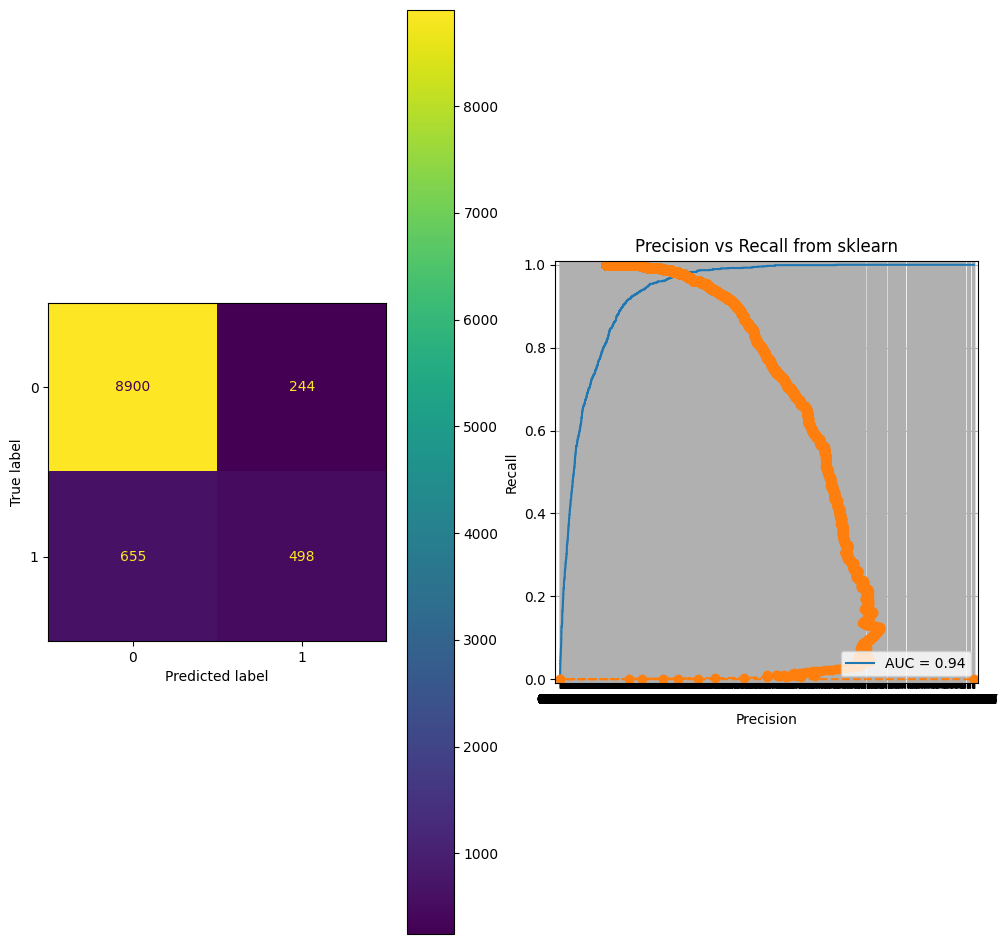

In [18]:
extractor = SelectFromModel(LogisticRegression(penalty='l1', solver = 'liblinear' ,random_state = 42))


lgr_pipe_sel = Pipeline([('transformer', ordinal_ohe_transformer),
                    ('selector', extractor),
                    ('lgr', LogisticRegression(random_state=42, max_iter = 1000))])

model_train_test(lgr_pipe_sel, 'LogisticRegression with selector',  X_train, y_train, X_test, y_test, df_scores, timeit_number = timeit_number)

### Decision tree

Scores for DecisionTreeClassifier 
                     Model  Train Time  Train accuracy  Test Accuracy
6  DecisionTreeClassifier    0.373683             1.0       0.884432
[0. 1.]


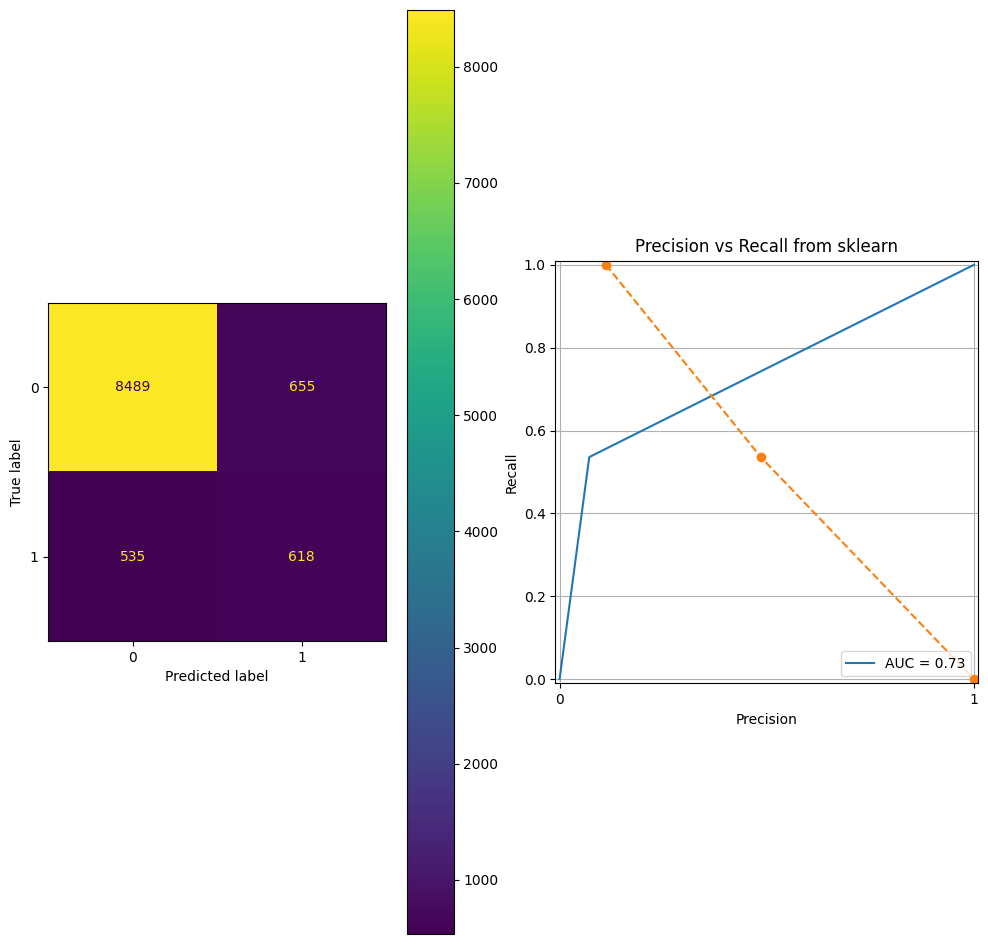

In [19]:
dtree_pipe = Pipeline([('transformer', ordinal_ohe_transformer),
                    ('dtree', DecisionTreeClassifier(random_state=42))])


model_train_test(dtree_pipe, 'DecisionTreeClassifier',  X_train, y_train, X_test, y_test, df_scores, timeit_number = timeit_number)

### Classifying Nonlinear Features

Scores for SVC 
   Model  Train Time  Train accuracy  Test Accuracy
8   SVC  112.607773        0.914117       0.910848
[0.00605711 0.00607247 0.00721078 0.00771298 0.00865199]


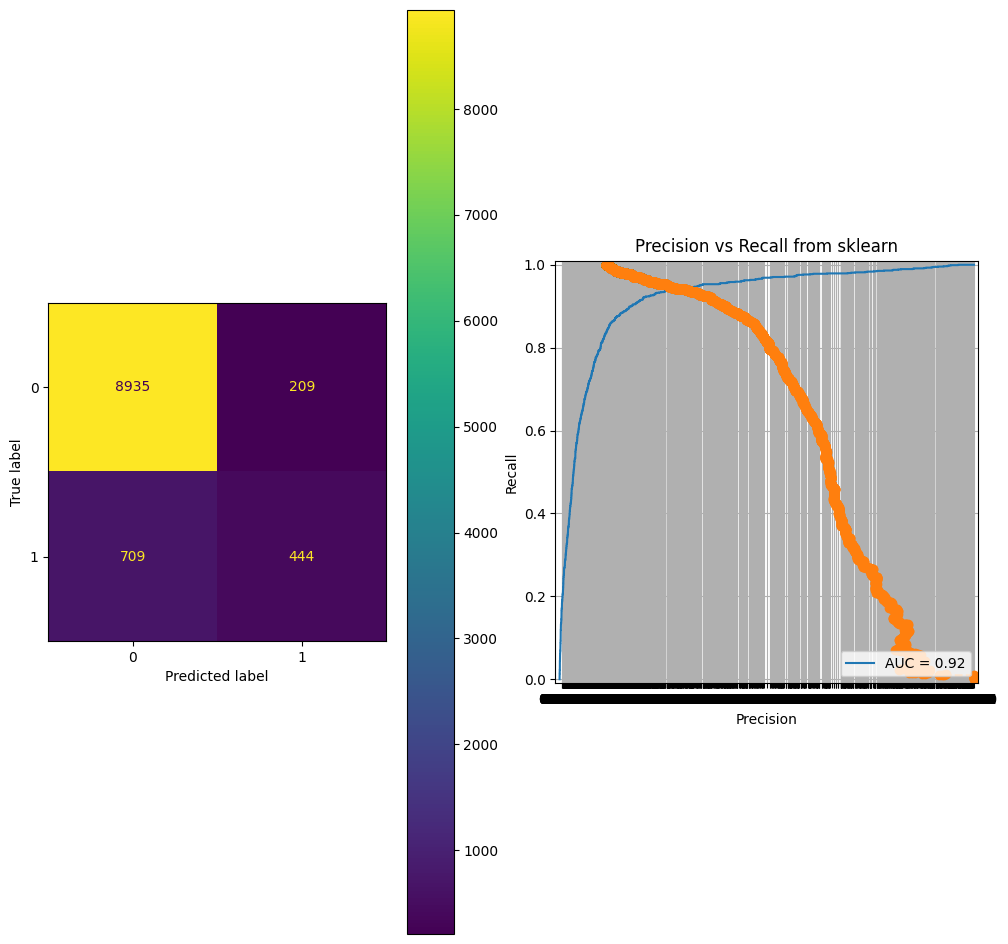

In [23]:

svc_pipe = Pipeline([('transformer', ordinal_ohe_transformer),
                    ('svc', SVC(probability=True, random_state=42))])

model_train_test(svc_pipe, 'SVC',  X_train, y_train, X_test, y_test, df_scores, timeit_number = timeit_number)

### Problem 9: Score the Model

What is the accuracy of your model?
- The best accuracy is 0.912693

In [24]:
print(f"Best test source found: {df_scores['Test Accuracy'].max():3f}" )


with pd.option_context('display.max_columns', None, 'display.width', 1000):    
    print(df_scores)


Best test source found: 0.912693
                                Model  Train Time  Train accuracy  Test Accuracy
0                            Baseline    0.000000        0.887346       0.887346
1                  LogisticRegression    4.983594        0.911625       0.912110
2  GridSearch for logistic regression    4.179550        0.911398       0.912013
3              RandomForestClassifier    2.907434        1.000000       0.912402
4                KNeighborsClassifier    0.091463        0.926613       0.903564
5    LogisticRegression with selector    9.848093        0.911657       0.912693
6              DecisionTreeClassifier    0.373683        1.000000       0.884432
7                                 SVC  104.313049        0.914117       0.910848
8                                 SVC  112.607773        0.914117       0.910848


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [104]:
print('Here are the test results:')
with pd.option_context('display.max_columns', None, 'display.width', 1000):    
    print(df_scores)

Here are the test results:
                              Model  Train Time  Train accuracy  Test Accuracy
0                          Baseline    0.000000        0.887346       0.887346
1                LogisticRegression    5.923255        0.911625       0.912110
2            RandomForestClassifier    2.941135        1.000000       0.912402
3              KNeighborsClassifier    0.124740        0.926613       0.903564
4  LogisticRegression with selector   11.788916        0.911657       0.912693
5            DecisionTreeClassifier    0.330450        1.000000       0.884432
6                               SVC  117.348478        0.914117       0.910848
7            RandomForestClassifier    2.643988        1.000000       0.911333


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### using class_weight='balanced' for RandomForestClassifier

Scores for RandomForestClassifier 
                     Model  Train Time  Train accuracy  Test Accuracy
7  RandomForestClassifier    2.643988             1.0       0.911333
[0.   0.01 0.02 0.03 0.04]


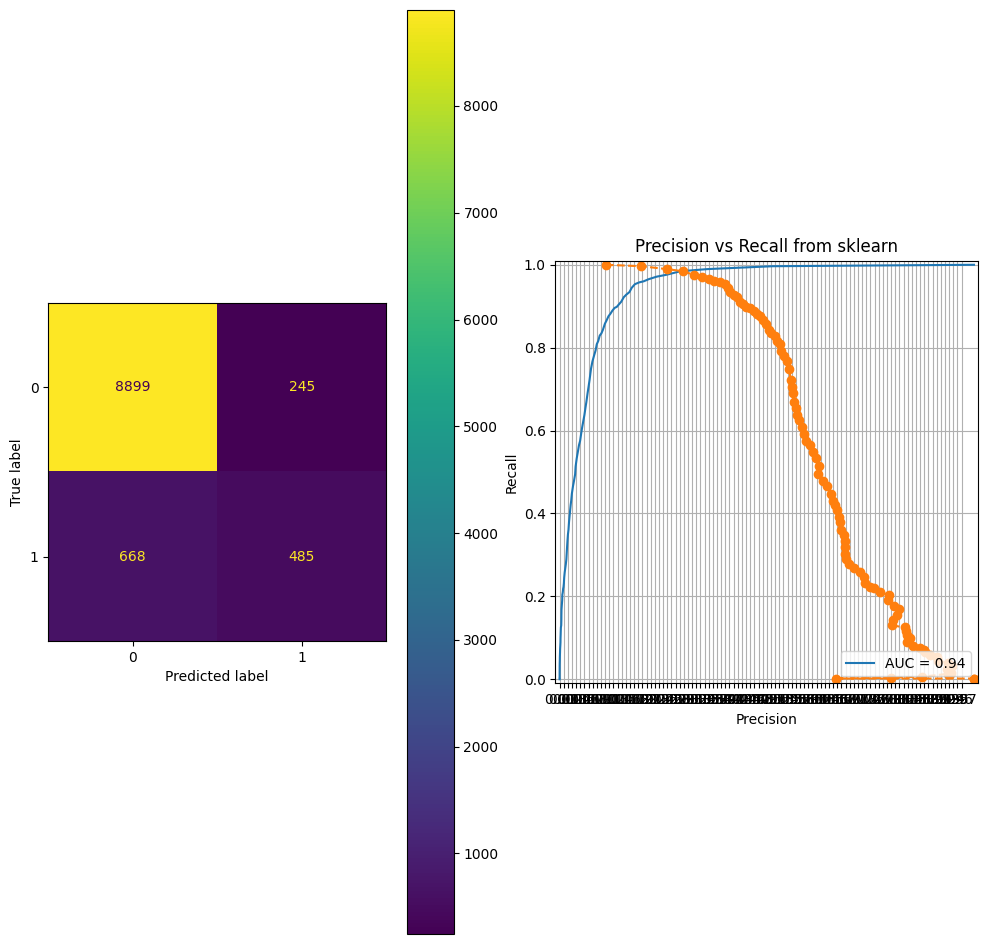

In [100]:
rf_pipeline = Pipeline([
    ('transformer', ordinal_ohe_transformer),   
    ('rf', RandomForestClassifier(class_weight='balanced',random_state=42))  
])
model_train_test(rf_pipeline, 'RandomForestClassifier',  X_train, y_train, X_test, y_test, df_scores, timeit_number= timeit_number)

In [101]:
### using class_weight='balanced' for DecisionTreeClassifier

dtree_pipe_balanced = Pipeline([('transformer', ordinal_ohe_transformer),
                    ('dtree', DecisionTreeClassifier(class_weight='balanced',random_state=42))])
model_train_test(dtree_pipe_balanced, 'DecisionTreeClassifier balanced',  X_train, y_train, X_test, y_test, df_scores, timeit_number = timeit_number)

### using class_weight='balanced' for KNeighborsClassifier

Scores for KNeighborsClassifier balanced 
                            Model  Train Time  Train accuracy  Test Accuracy
9  KNeighborsClassifier balanced    0.084104        0.926613       0.903564
[0.  0.2 0.4 0.6 0.8]


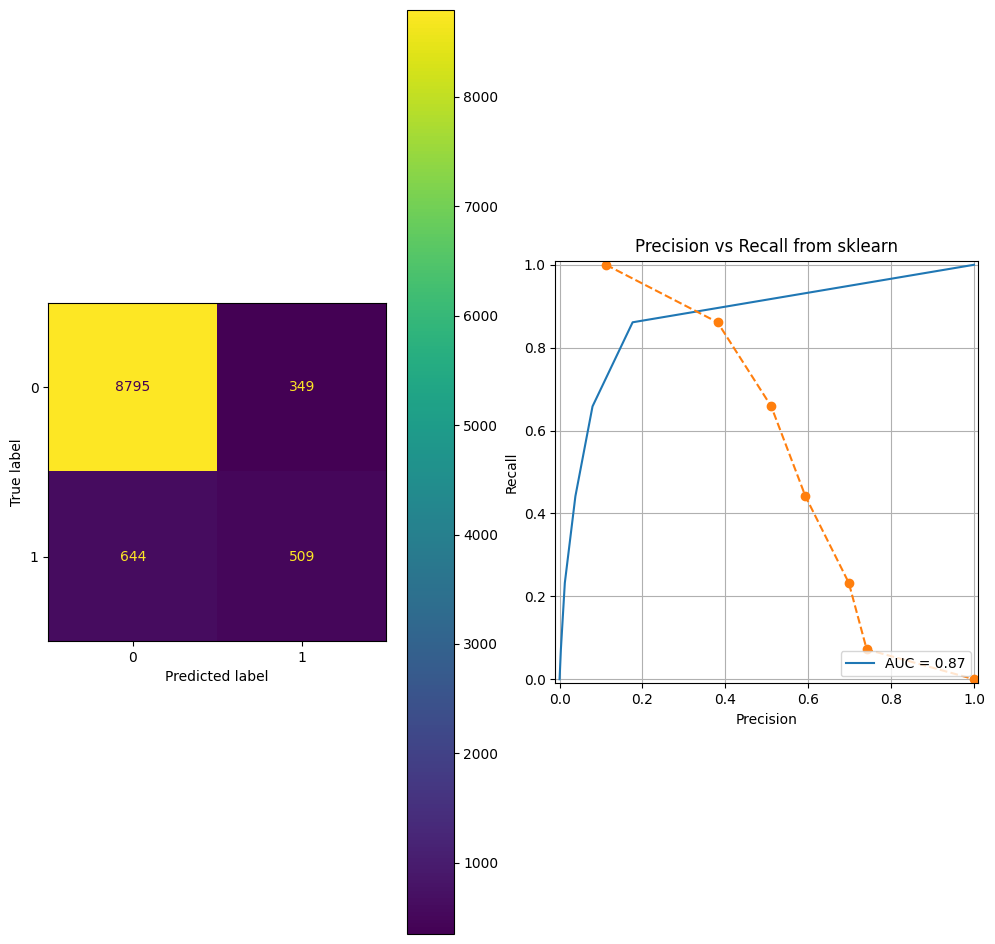

In [25]:
knn_pipeline_balanced = Pipeline([
    ('transformer', ordinal_ohe_transformer),   
    ('knn', KNeighborsClassifier())
])

model_train_test(knn_pipeline_balanced, 'KNeighborsClassifier balanced',  X_train, y_train, X_test, y_test, df_scores, timeit_number = timeit_number)

### using class_weight='balanced' for LogisticRegression

Scores for LogisticRegression balanced 
                           Model  Train Time  Train accuracy  Test Accuracy
10  LogisticRegression balanced    6.228841        0.859894       0.860736
[0.0025694  0.00303904 0.00360572 0.00389565 0.00396622]


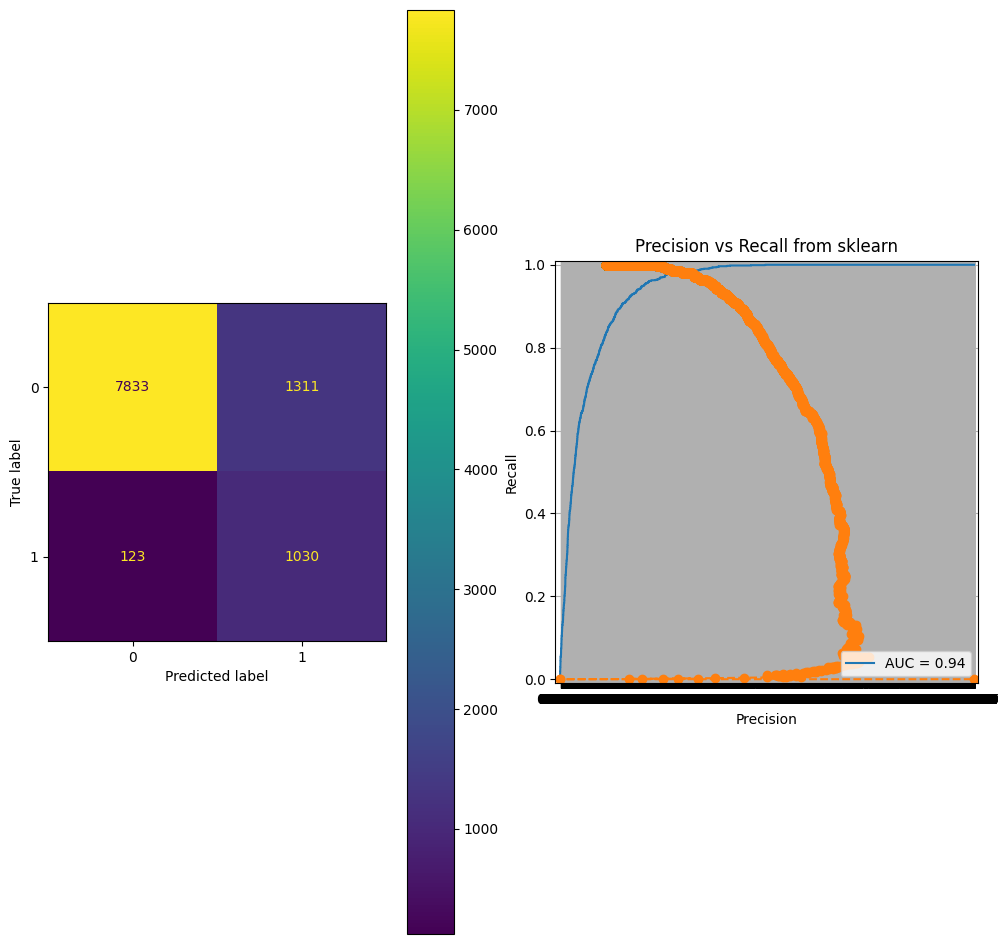

In [26]:
lr_pipeline_balanced = Pipeline([
    ('transformer', ordinal_ohe_transformer),   
    ('logistic', LogisticRegression(class_weight='balanced',random_state=42, max_iter=1000))  
])
model_train_test(lr_pipeline_balanced, 'LogisticRegression balanced',  X_train, y_train, X_test, y_test, df_scores, timeit_number= timeit_number)

In [ ]:
### using class_weight='balanced' for LogisticRegression with selector

Scores for LogisticRegression with selector balanced 
                                         Model  Train Time  Train accuracy  \
11  LogisticRegression with selector balanced   10.574428        0.859862   

    Test Accuracy  
11       0.861027  
[0.00259414 0.00304783 0.00364519 0.00394422 0.00399917]


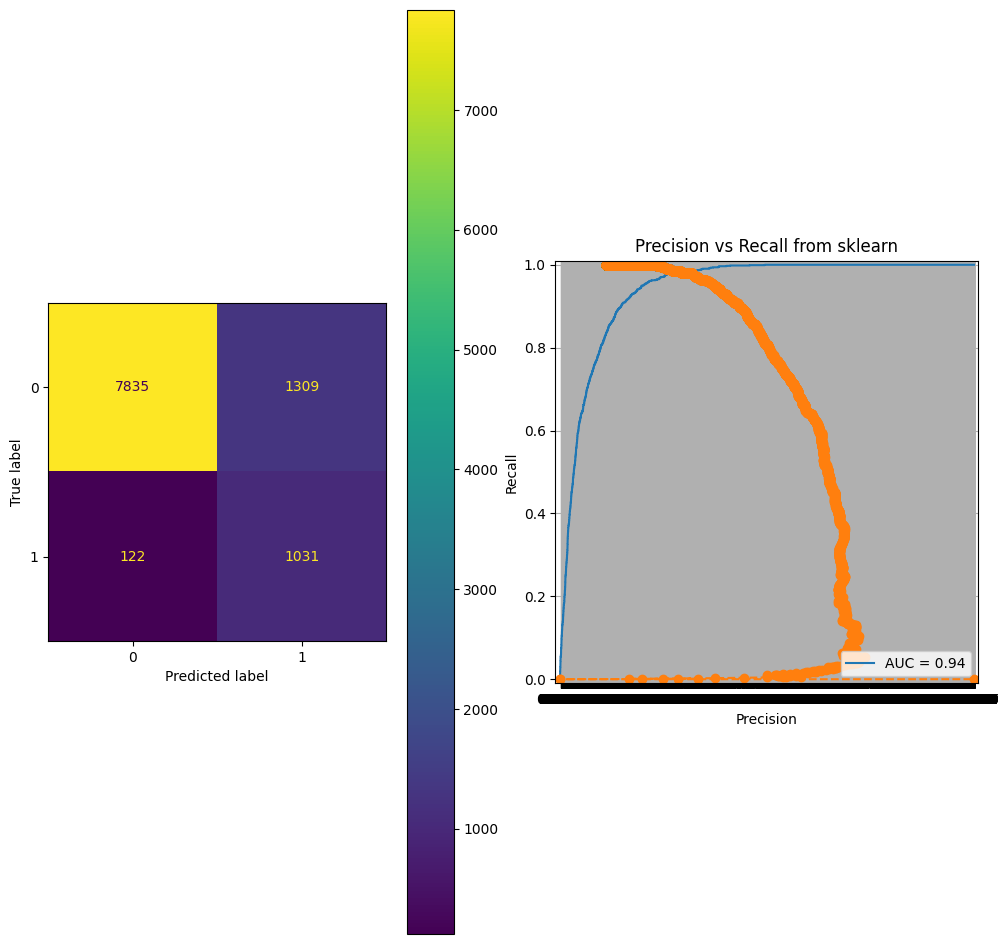

In [27]:
lgr_pipe_sel_balanced = Pipeline([('transformer', ordinal_ohe_transformer),
                    ('selector', extractor),
                    ('lgr', LogisticRegression(class_weight='balanced',random_state=42, max_iter = 1000))])

model_train_test(lgr_pipe_sel_balanced, 'LogisticRegression with selector balanced',  X_train, y_train, X_test, y_test, df_scores, timeit_number = timeit_number)

### using class_weight='balanced' for SVC

Scores for SVC balanced 
            Model  Train Time  Train accuracy  Test Accuracy
12  SVC balanced    192.6574        0.848014       0.843644
[3.18101060e-05 4.41599324e-05 5.24327601e-05 5.85449267e-05
 5.86945450e-05]


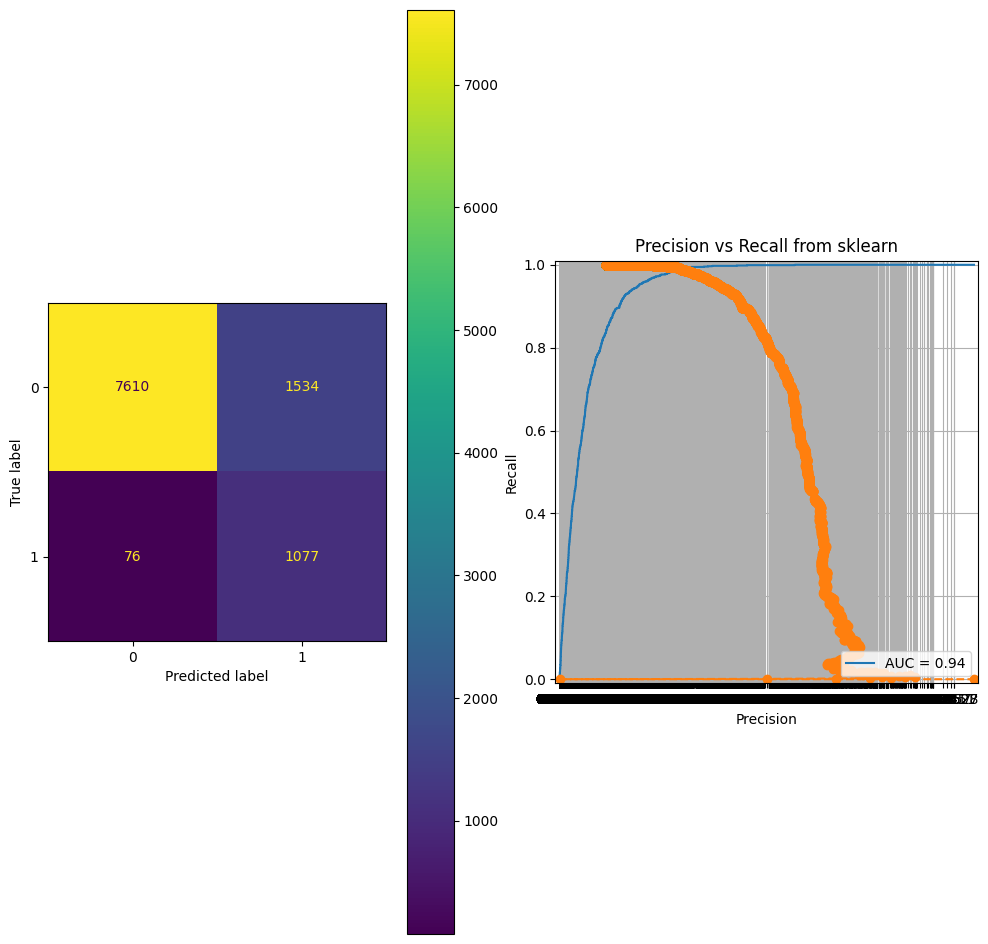

In [28]:
svc_pipe_balanced = Pipeline([('transformer', ordinal_ohe_transformer),
                    ('svc', SVC(class_weight='balanced', probability=True, random_state=42))])

model_train_test(svc_pipe_balanced, 'SVC balanced',  X_train, y_train, X_test, y_test, df_scores, timeit_number = timeit_number)

### GridSearch for KNN model

Scores for GridSearch for KNN 
                  Model  Train Time  Train accuracy  Test Accuracy
13  GridSearch for KNN     0.09426        0.908064       0.907352
[0.         0.02040816 0.04081633 0.06122449 0.08163265]


(Pipeline(steps=[('transformer',
                  ColumnTransformer(remainder=StandardScaler(),
                                    transformers=[('ordinalencoder',
                                                   OrdinalEncoder(categories=[['illiterate',
                                                                               'basic.4y',
                                                                               'basic.6y',
                                                                               'basic.9y',
                                                                               'high.school',
                                                                               'professional.course',
                                                                               'university.degree',
                                                                               'unknown']],
                                                                  handle_unknown

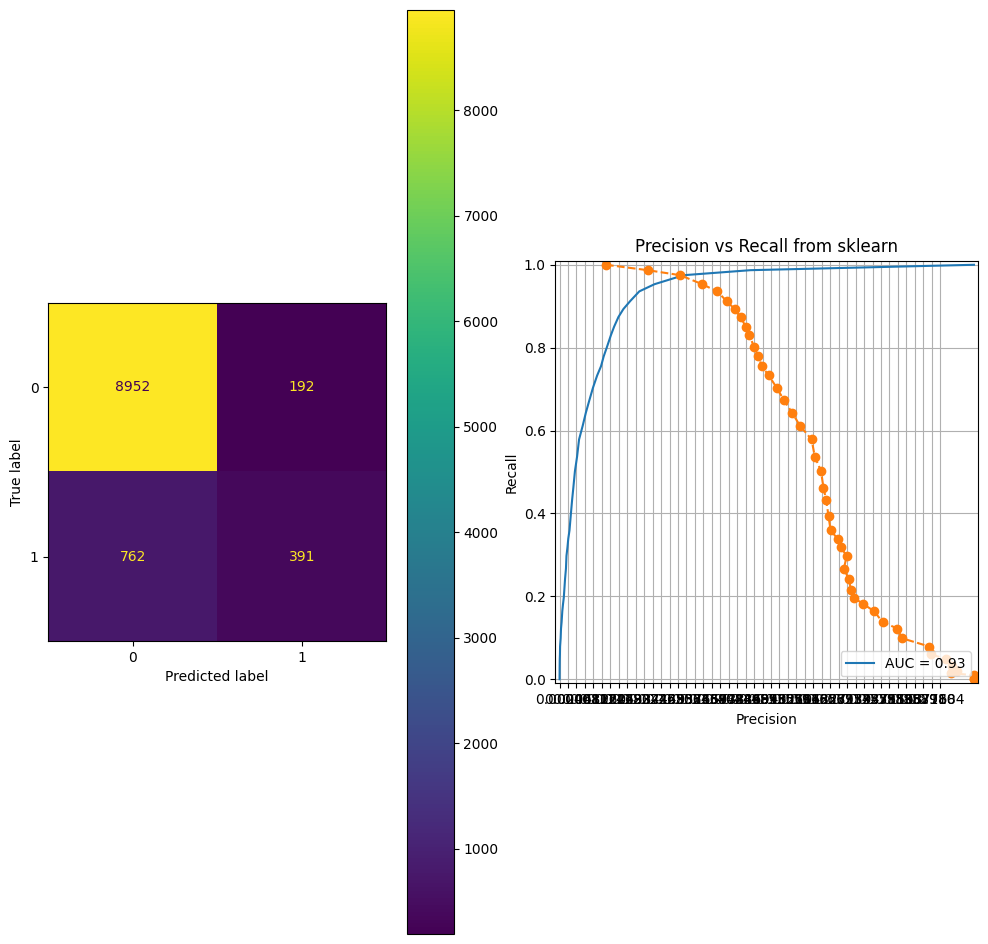

In [29]:
dtree_pipe = Pipeline([('transformer', ordinal_ohe_transformer),
                    ('dtree', DecisionTreeClassifier(class_weight='balanced',random_state=42))])

knn_grid = GridSearchCV(knn_pipeline, param_grid={'knn__n_neighbors': range(1, 51, 2)}, scoring = 'roc_auc')

grid_search(knn_grid, 'GridSearch for KNN',  X_train, y_train, X_test, y_test, df_scores, timeit_number)


### GridSearch for Logistic Regression classification 

/home/ming/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ming/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ming/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ming/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ming/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ming/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: Convergen

Scores for GridSearch for logistic regression 
                                  Model  Train Time  Train accuracy  \
14  GridSearch for logistic regression    3.200713        0.911398   

    Test Accuracy  
14       0.912013  
[0.00081553 0.00089531 0.0012396  0.00129465 0.00145048]


(Pipeline(steps=[('transformer',
                  ColumnTransformer(remainder=StandardScaler(),
                                    transformers=[('ordinalencoder',
                                                   OrdinalEncoder(categories=[['illiterate',
                                                                               'basic.4y',
                                                                               'basic.6y',
                                                                               'basic.9y',
                                                                               'high.school',
                                                                               'professional.course',
                                                                               'university.degree',
                                                                               'unknown']],
                                                                  handle_unknown

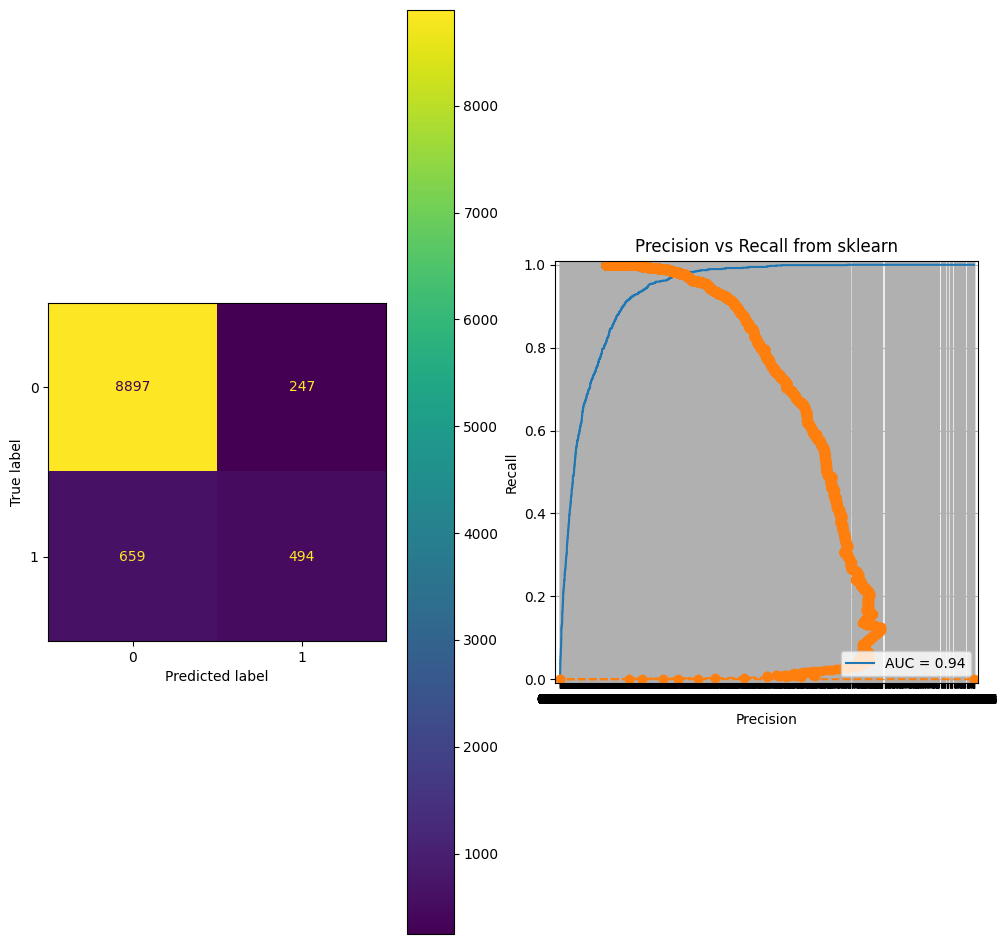

In [30]:
param_grid = {
    'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logistic__penalty': ['l1', 'l2'],
    'logistic__solver': ['liblinear', 'saga']
}

lgr_grid = GridSearchCV(lr_pipeline, param_grid=param_grid, n_jobs=16)

grid_search(lgr_grid, 'GridSearch for logistic regression',  X_train, y_train, X_test, y_test, df_scores, timeit_number)


### GridSearch for Logistic Regression classification 

Scores for GridSearch for logistic regression with selector 
                                                Model  Train Time  \
17  GridSearch for logistic regression with selector    7.700851   

    Train accuracy  Test Accuracy  
17         0.91156       0.912013  
[0.00081876 0.00089425 0.00124045 0.00129387 0.00143949]


(Pipeline(steps=[('transformer',
                  ColumnTransformer(remainder=StandardScaler(),
                                    transformers=[('ordinalencoder',
                                                   OrdinalEncoder(categories=[['illiterate',
                                                                               'basic.4y',
                                                                               'basic.6y',
                                                                               'basic.9y',
                                                                               'high.school',
                                                                               'professional.course',
                                                                               'university.degree',
                                                                               'unknown']],
                                                                  handle_unknown

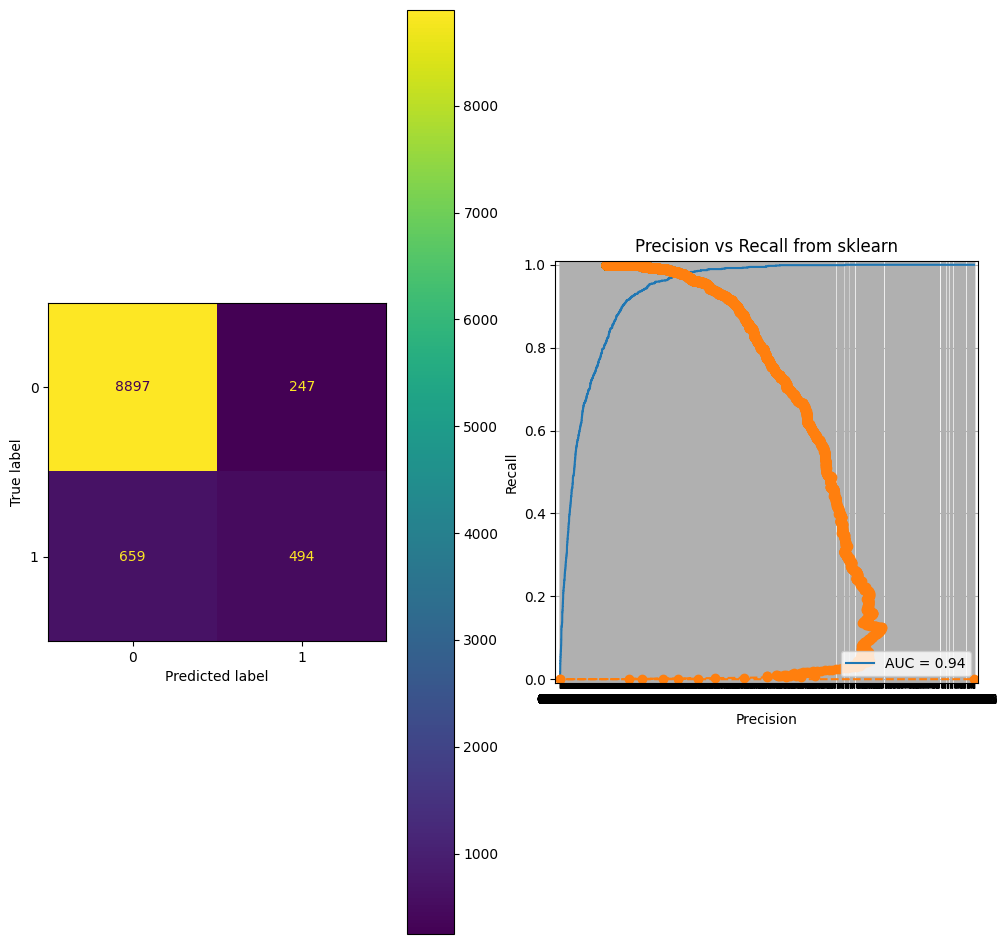

In [33]:
lgr_pipe_sel
param_grid = {
    'lgr__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'lgr__penalty': ['l1', 'l2'],
    'lgr__solver': ['liblinear', 'saga']
}

lgr_sel_grid = GridSearchCV(lgr_pipe_sel, param_grid=param_grid, n_jobs=-1)

grid_search(lgr_sel_grid, 'GridSearch for logistic regression with selector',  X_train, y_train, X_test, y_test, df_scores, timeit_number)

### GridSearch for SVC 

Scores for GridSearch for SVC 
                  Model  Train Time  Train accuracy  Test Accuracy
18  GridSearch for SVC    99.70212        0.916804       0.909585
[1.00000010e-07 2.95178407e-07 8.13362185e-07 1.41572644e-06
 2.62214991e-06]


(Pipeline(steps=[('transformer',
                  ColumnTransformer(remainder=StandardScaler(),
                                    transformers=[('ordinalencoder',
                                                   OrdinalEncoder(categories=[['illiterate',
                                                                               'basic.4y',
                                                                               'basic.6y',
                                                                               'basic.9y',
                                                                               'high.school',
                                                                               'professional.course',
                                                                               'university.degree',
                                                                               'unknown']],
                                                                  handle_unknown

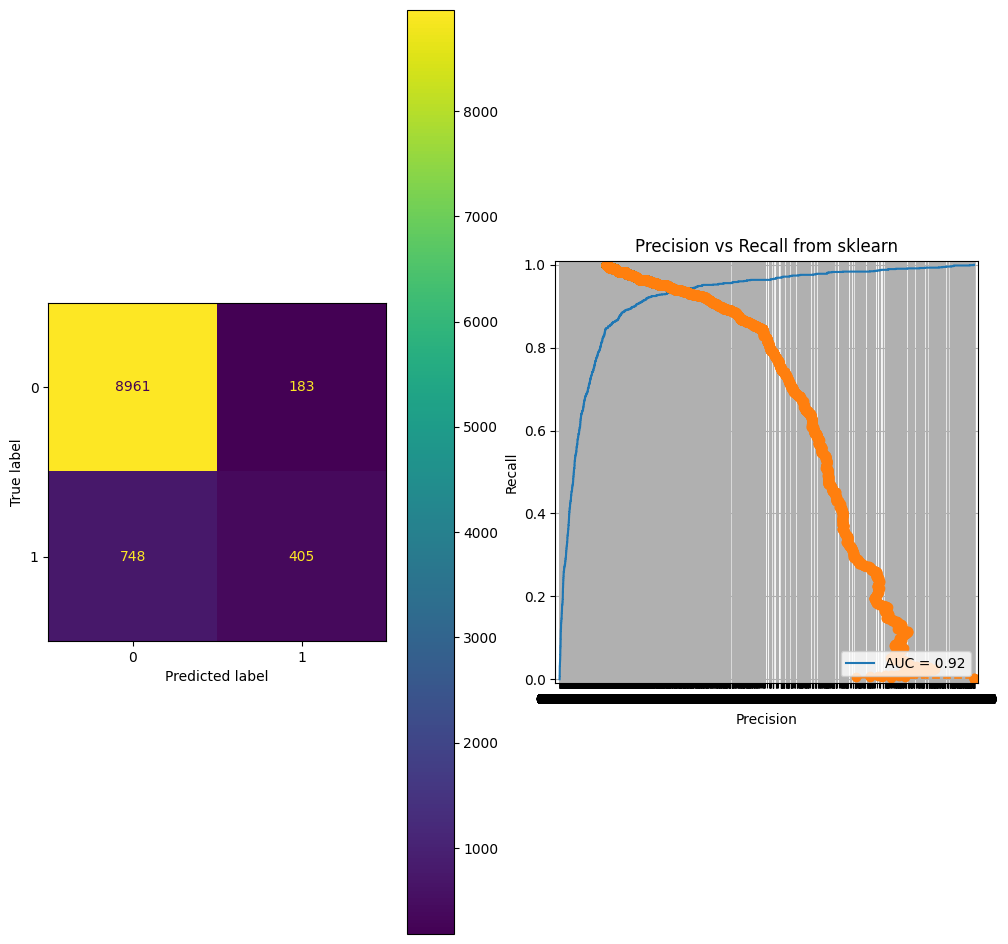

In [34]:
param_grid = {
    #'svc__C': [0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf', 'poly','sigmoid'],
    #'svc__gamma': ['scale', 'auto', 0.1, 1],
    #'svc__degree': [2, 3]  # Only used for 'poly' kernel
}

csv_grid = GridSearchCV(svc_pipe, param_grid=param_grid, n_jobs=-1)

grid_search(csv_grid, 'GridSearch for SVC',  X_train, y_train, X_test, y_test, df_scores, timeit_number)

### GridSearch for SVC with RBF kernel

Scores for GridSearch for SVC with RBF kernel 
                                  Model  Train Time  Train accuracy  \
19  GridSearch for SVC with RBF kernel   96.439013        0.923667   

    Test Accuracy  
19       0.914441  
[0.00250629 0.00296902 0.00333721 0.00366912 0.00373482]


(Pipeline(steps=[('transformer',
                  ColumnTransformer(remainder=StandardScaler(),
                                    transformers=[('ordinalencoder',
                                                   OrdinalEncoder(categories=[['illiterate',
                                                                               'basic.4y',
                                                                               'basic.6y',
                                                                               'basic.9y',
                                                                               'high.school',
                                                                               'professional.course',
                                                                               'university.degree',
                                                                               'unknown']],
                                                                  handle_unknown

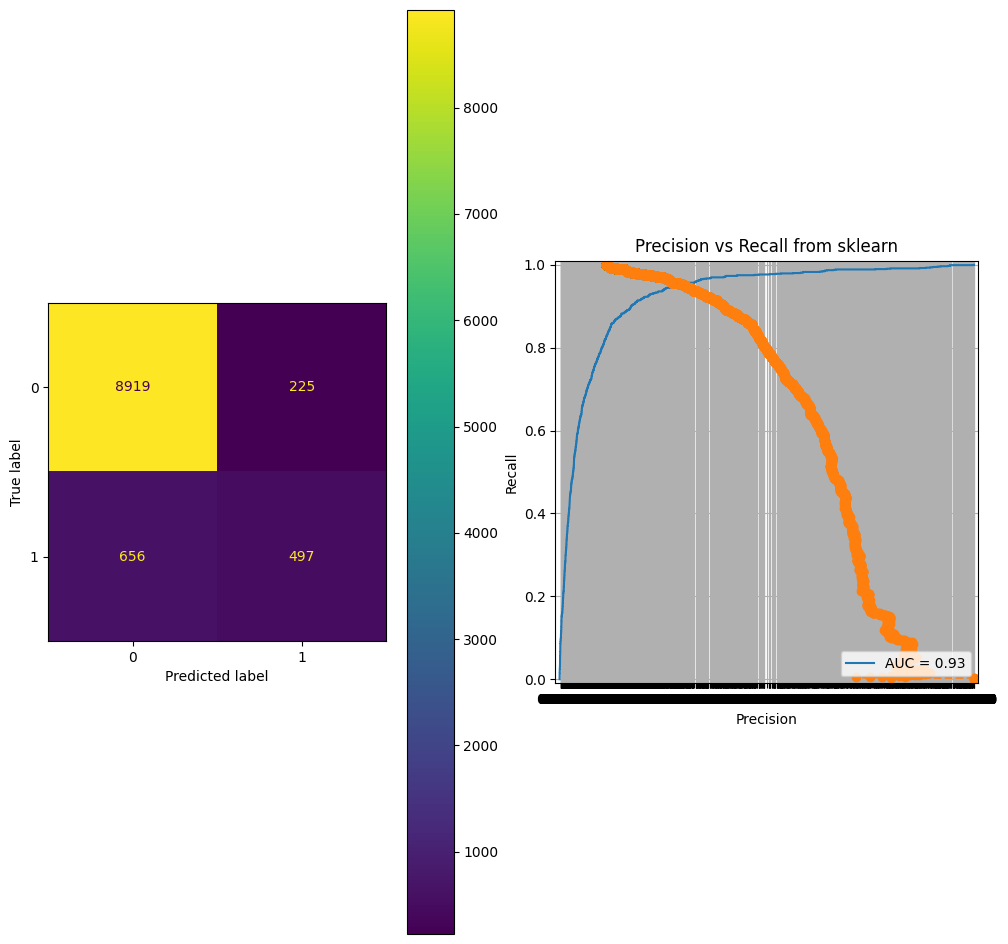

In [35]:
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__kernel': ['rbf'],
    'svc__gamma': ['scale', 'auto', 0.1, 1],
    #'svc__degree': [2, 3]  # Only used for 'poly' kernel
}

csv_grid_rbf = GridSearchCV(svc_pipe, param_grid=param_grid, n_jobs=-1)

grid_search(csv_grid_rbf, 'GridSearch for SVC with RBF kernel',  X_train, y_train, X_test, y_test, df_scores, timeit_number)
#(best_model, best_params)

### GridSearch for DecisionTree

Scores for GridSearch for DecisionTree 
                           Model  Train Time  Train accuracy  Test Accuracy
20  GridSearch for DecisionTree    0.246616             1.0       0.893367
[0. 1.]


(Pipeline(steps=[('transformer',
                  ColumnTransformer(remainder=StandardScaler(),
                                    transformers=[('ordinalencoder',
                                                   OrdinalEncoder(categories=[['illiterate',
                                                                               'basic.4y',
                                                                               'basic.6y',
                                                                               'basic.9y',
                                                                               'high.school',
                                                                               'professional.course',
                                                                               'university.degree',
                                                                               'unknown']],
                                                                  handle_unknown

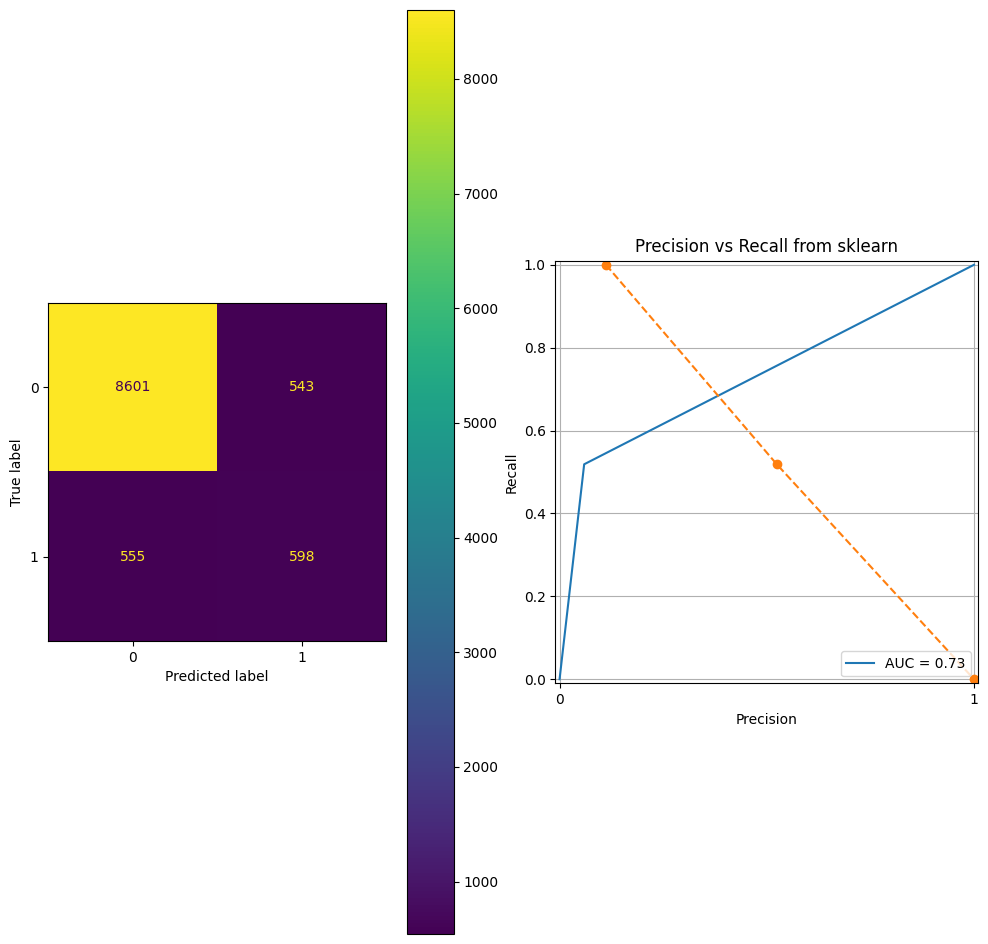

In [36]:
param_grid = {
    'dtree__max_depth': [None, 3, 5, 10, 20],
    'dtree__min_samples_split': [2, 5, 10],
    'dtree__min_samples_leaf': [1, 2, 4],
    'dtree__criterion': ['gini', 'entropy']
}

grid_dt= GridSearchCV(estimator=dtree_pipe, param_grid=param_grid, n_jobs=-1)
grid_search(grid_dt, 'GridSearch for DecisionTree',  X_train, y_train, X_test, y_test, df_scores, timeit_number)


### Use a VotingClassifier to combine predictions from multiple models

Scores for VotingClassifier 
                Model  Train Time  Train accuracy  Test Accuracy
21  VotingClassifier  164.319604        0.931436       0.914441
[0.00092436 0.00119542 0.00126251 0.00127831 0.00150563]


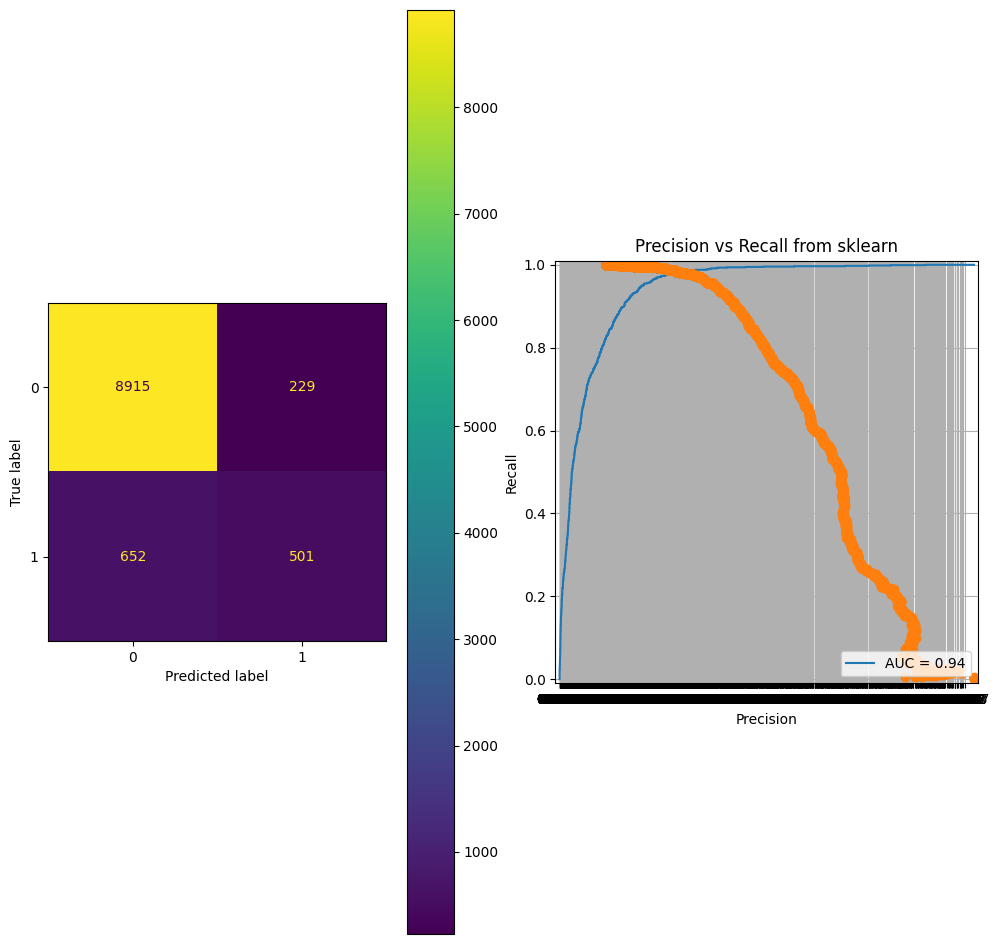

In [39]:
knn = knn_grid.best_estimator_
dt = grid_dt.best_estimator_
lr = lgr_grid.best_estimator_

lr_sel = lgr_sel_grid.best_estimator_
svc = csv_grid.best_estimator_
svc_rbf = csv_grid_rbf.best_estimator_

voting_clf = VotingClassifier(estimators=[
    ('knn', knn), ('dt', dt), ('lr', lr), ('lr_sel',lr_sel), ('svc', svc),('svc_rbf',svc_rbf)], voting='soft', n_jobs=-1)
model_train_test(voting_clf, 'VotingClassifier',  X_train, y_train, X_test, y_test, df_scores, timeit_number= timeit_number)

#voting_clf.fit(X_train, y_train)
#print("Voting Classifier score:", voting_clf.score(X_test, y_test))

##### Questions